# Create your collection of songs & audio features

Instructions
To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [36]:
# !pip install spotipy

In [37]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from pandas import json_normalize

retrieving secrets

The clientid and clientsecret are stored in a file 'secrets.txt' in the following format:
2 lines,
first line has 'clientid:ekjffee',
second line has 'clientsecret:ksjbvdksbvksb',
without the quotes and the commas, of course.

The reason is that we want to keep this secret data out of our notebook. By creating a .gitignore file containing the name of the file secrets.txt on a line by its own, we prevent the secrets file from being pushed to github, and thereby being published for the world to see.

In [38]:
secrets_file = open("secrets.txt","r")

In [39]:
string = secrets_file.read()

In [40]:
string

'Client ID:ed1e16753c124a96a1357b5a21765ca8\nClient secret:c73a2c22c1bf4001b403e241de752cf6'

In [41]:
string.split('\n')

['Client ID:ed1e16753c124a96a1357b5a21765ca8',
 'Client secret:c73a2c22c1bf4001b403e241de752cf6']

In [42]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [43]:
secrets_dict

{'Client ID': 'ed1e16753c124a96a1357b5a21765ca8',
 'Client secret': 'c73a2c22c1bf4001b403e241de752cf6'}

authentication with secrets

In [44]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['Client ID'],
                                                           client_secret=secrets_dict['Client secret']))

In [45]:
# playlist = sp.user_playlist_tracks("spotify", "https://open.spotify.com/playlist/4RVf1hHtwvMEED3yuCNi8q?si=84ad4ca4b8694997")

In [46]:
playlist = sp.user_playlist_tracks("spotify", "1G8IpkZKobrIlXcVPoSIuf")

In [47]:
playlist["total"] 

10000

In [48]:
playlist['items']

[{'added_at': '2020-11-29T15:02:07Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/acclaimedmusic'},
   'href': 'https://api.spotify.com/v1/users/acclaimedmusic',
   'id': 'acclaimedmusic',
   'type': 'user',
   'uri': 'spotify:user:acclaimedmusic'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
      'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
      'id': '74ASZWbe4lXaubB36ztrGX',
      'name': 'Bob Dylan',
      'type': 'artist',
      'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'H

In [49]:
len(playlist["items"])

100

In [50]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.playlist_tracks("1G8IpkZKobrIlXcVPoSIuf")
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        tracks.extend(results['items'])
        sleep(randint(1,3000)/1000)
    return tracks

In [51]:
playlist_id = '1G8IpkZKobrIlXcVPoSIuf'
all_tracks = get_playlist_tracks(playlist_id)
# all_tracks
# len(all_tracks)

In [52]:
tracks2 = json_normalize(all_tracks)
pd.set_option("display.max_columns", 0)
tracks2

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,track.album.available_markets,track.album.external_urls.spotify,track.album.href,track.album.id,track.album.images,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.album.uri,track.artists,track.available_markets,track.disc_number,track.duration_ms,track.episode,track.explicit,track.external_ids.isrc,track.external_urls.spotify,track.href,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url,track
0,2020-11-29T15:02:07Z,False,None,https://open.spotify.com/user/acclaimedmusic,https://api.spotify.com/v1/users/acclaimedmusic,acclaimedmusic,user,spotify:user:acclaimedmusic,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://open.spotify.com/album/6YabPKtZAjxwyWb...,https://api.spotify.com/v1/albums/6YabPKtZAjxw...,6YabPKtZAjxwyWbuO9p4ZD,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Highway 61 Revisited,1965-08-30,day,9.0,album,spotify:album:6YabPKtZAjxwyWbuO9p4ZD,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1.0,369600.0,False,False,USSM19922509,https://open.spotify.com/track/3AhXZa8sUQht0UE...,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,3AhXZa8sUQht0UEdBJgpGc,False,Like a Rolling Stone,72.0,https://p.scdn.co/mp3-preview/d48c45e3194cfe07...,True,1.0,track,spotify:track:3AhXZa8sUQht0UEdBJgpGc,None,NaN
1,2020-11-29T15:02:07Z,False,None,https://open.spotify.com/user/acclaimedmusic,https://api.spotify.com/v1/users/acclaimedmusic,acclaimedmusic,user,spotify:user:acclaimedmusic,album,[{'external_urls': {'spotify': 'https://open.s...,[],https://open.spotify.com/album/6okv1avxEgYSdc2...,https://api.spotify.com/v1/albums/6okv1avxEgYS...,6okv1avxEgYSdc2JYy6ZEi,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Nevermind,1991-09-26,day,12.0,album,spotify:album:6okv1avxEgYSdc2JYy6ZEi,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,301240.0,False,False,USGF19942501,https://open.spotify.com/track/3oTlkzk1OtrhH8w...,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,3oTlkzk1OtrhH8wBAduVEi,False,Smells Like Teen Spirit,0.0,None,True,1.0,track,spotify:track:3oTlkzk1OtrhH8wBAduVEi,None,NaN
2,2020-11-29T15:02:07Z,False,None,https://open.spotify.com/user/acclaimedmusic,https://api.spotify.com/v1/users/acclaimedmusic,acclaimedmusic,user,spotify:user:acclaimedmusic,album,[{'external_urls': {'spotify': 'https://open.s...,[],https://open.spotify.com/album/1PULmKbHeOqlkIw...,https://api.spotify.com/v1/albums/1PULmKbHeOql...,1PULmKbHeOqlkIwcDMNwD4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sgt. Pepper's Lonely Hearts Club Band (Remaste...,1967-06-01,day,13.0,album,spotify:album:1PULmKbHeOqlkIwcDMNwD4,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,337413.0,False,False,GBAYE0601519,https://open.spotify.com/track/3ZFBeIyP41HhnAL...,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,3ZFBeIyP41HhnALjxWy1pR,False,A Day In The Life - Remastered,0.0,None,True,13.0,track,spotify:track:3ZFBeIyP41HhnALjxWy1pR,None,NaN
3,2020-11-29T15:02:07Z,False,None,https://open.spotify.com/user/acclaimedmusic,https://api.spotify.com/v1/users/acclaimedmusic,acclaimedmusic,user,spotify:user:acclaimedmusic,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://open.spotify.com/album/3yGRRfowVUIj29z...,https://api.spotify.com/v1/albums/3yGRRfowVUIj...,3yGRRfowVUIj29zEwgLYY7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Smiley Smile (Mono & Stereo),1967-09-18,day,22.0,album,spotify:album:3yGRRfowVUIj29zEwgLYY7,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1.0,219146.0,False,False,USCA21202140

In [53]:
tracks2.isnull().sum()

added_at                                  0
is_local                                  0
primary_color                         19900
added_by.external_urls.spotify            0
added_by.href                             0
added_by.id                               0
added_by.type                             0
added_by.uri                              0
track.album.album_type                  106
track.album.artists                       4
track.album.available_markets             4
track.album.external_urls.spotify       106
track.album.href                        106
track.album.id                          106
track.album.images                        4
track.album.name                          4
track.album.release_date                106
track.album.release_date_precision      106
track.album.total_tracks                106
track.album.type                          4
track.album.uri                         106
track.artists                             4
track.available_markets         

In [54]:
tracks2.dropna(subset=['track.album.artists'], inplace=True)

In [55]:
tracks2.isnull().sum()

added_at                                  0
is_local                                  0
primary_color                         19896
added_by.external_urls.spotify            0
added_by.href                             0
added_by.id                               0
added_by.type                             0
added_by.uri                              0
track.album.album_type                  102
track.album.artists                       0
track.album.available_markets             0
track.album.external_urls.spotify       102
track.album.href                        102
track.album.id                          102
track.album.images                        0
track.album.name                          0
track.album.release_date                102
track.album.release_date_precision      102
track.album.total_tracks                102
track.album.type                          0
track.album.uri                         102
track.artists                             0
track.available_markets         

In [61]:
artists_df2 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify','song_id', 'song_name', 'popularity' ])

for i in range(len(tracks2)):
    artists_for_song = json_normalize(tracks2.iloc[i]['track.artists'])
    artists_for_song['song_id']    = tracks2.iloc[i]['track.id']
    artists_for_song['song_name']  = tracks2.iloc[i]['track.name']
    artists_for_song['popularity'] = tracks2.iloc[i]['track.popularity']
    artists_df2 = pd.concat([artists_df2, artists_for_song], axis=0)

In [62]:
tracks2.iloc[5]['track.name']

'Respect'

In [63]:
artists_df2

,href,id,name,type,uri,external_urls.spotify,song_id,song_name,popularity
0,https://api.spotify.com/v1/artists/74ASZWbe4lX...,74ASZWbe4lXaubB36ztrGX,Bob Dylan,artist,spotify:artist:74ASZWbe4lXaubB36ztrGX,https://open.spotify.com/artist/74ASZWbe4lXaub...,3AhXZa8sUQht0UEdBJgpGc,Like a Rolling Stone,72.0
0,https://api.spotify.com/v1/artists/6olE6TJLqED...,6olE6TJLqED3rqDCT0FyPh,Nirvana,artist,spotify:artist:6olE6TJLqED3rqDCT0FyPh,https://open.spotify.com/artist/6olE6TJLqED3rq...,3oTlkzk1OtrhH8wBAduVEi,Smells Like Teen Spirit,0.0
0,https://api.spotify.com/v1/artists/3WrFJ7ztbog...,3WrFJ7ztbogyGnTHbHJFl2,The Beatles,artist,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,https://open.spotify.com/artist/3WrFJ7ztbogyGn...,3ZFBeIyP41HhnALjxWy1pR,A Day In The Life - Remastered,0.0
0,https://api.spotify.com/v1/artists/3oDbviiivRW...,3oDbviiivRWhXwIE8hxkVV,The Beach Boys,artist,spotify:artist:3oDbviiivRWhXwIE8hxkVV,https://open.spotify.com/artist/3oDbviiivRWhXw...,5Qt4Cc66g24QWwGP3YYV9y,Good Vibrations (Mono),22.0
0,https://api.spotify.com/v1/artists/293zczrfYaf...,293zczrfYafIItmnmM3coR,Chuck Berry,artist,spotify:artist:293zczrfYafIItmnmM3coR,https://open.spotify.com/artist/293zczrfYafIIt...,7MH2ZclofPlTrZOkPzZKhK,Johnny B Goode,0.0
...,...,...,...,...,...,...,...,...,...
0,https://api.spotify.com/v1/artists/2vwI9jlKSgJ...,2vwI9jlKSgJbne3dlTzaLO,Skids,artist,spotify:artist:2vwI9jlKSgJbne3dlTzaLO,https://open.spotify.com/artist/2vwI9jlKSgJbne...,2QSD3K3b3BJ8DPhGhQfDPW,Into The Valley,46.0
0,https://api.spotify.com/v1/artists/7xTKLpo7UCz...,7xTKLpo7UCzXSnlH7fOIoM,Redman,artist,spotify:artist:7xTKLpo7UCzXSnlH7fOIoM,https://open.spotify.com/artist/7xTKLpo7UCzXSn...,49XnDVsYOHgV4gFZeCojKj,Tonight's Da Night,0.0
0,https://api.spotify.com/v1/artists/6nB0iY1cjSY...,6nB0iY1cjSY1KyhYyuIIKH,FKA twigs,artist,spotify:artist:6nB0iY1cjSY1KyhYyuIIKH,https://open.spotify.com/artist/6nB0iY1cjSY1Ky...,5Y9IIH8Xmo1nuk0gfFjc4Q,Figure 8,0.0
0,https://api.spotify.com/v1/artists/3LrsctPHK5w...,3LrsctPHK5wMdvEqvFN8BW,The Mighty Lemon Drops,artist,spotify:artist:3LrsctPHK5wMdvEqvFN8BW,https://open.spotify.com/artist/3LrsctPHK5wMdv...,0ya0JYEFoXNviB8RMeHDtW,Like An Angel,0.0


In [66]:
songs_data = artists_df2[['song_name', 'name', 'song_id', 'popularity', 'uri']]
songs_data

,song_name,name,song_id,popularity,uri
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,72.0,spotify:artist:74ASZWbe4lXaubB36ztrGX
0,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.0,spotify:artist:6olE6TJLqED3rqDCT0FyPh
0,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.0,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2
0,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,22.0,spotify:artist:3oDbviiivRWhXwIE8hxkVV
0,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.0,spotify:artist:293zczrfYafIItmnmM3coR
...,...,...,...,...,...
0,Into The Valley,Skids,2QSD3K3b3BJ8DPhGhQfDPW,46.0,spotify:artist:2vwI9jlKSgJbne3dlTzaLO
0,Tonight's Da Night,Redman,49XnDVsYOHgV4gFZeCojKj,0.0,spotify:artist:7xTKLpo7UCzXSnlH7fOIoM
0,Figure 8,FKA twigs,5Y9IIH8Xmo1nuk0gfFjc4Q,0.0,spotify:artist:6nB0iY1cjSY1KyhYyuIIKH
0,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.0,spotify:artist:3LrsctPHK5wMdvEqvFN8BW


# AUDIO FEATURES

In [75]:
songs_data.isnull().sum()

song_name       0
name            0
song_id       102
popularity      0
uri           102
dtype: int64

In [76]:
songs_data.dropna(inplace=True)

C:\Users\zaras\AppData\Local\Temp\ipykernel_3292\965766301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_data.dropna(inplace=True)


In [78]:
songs_data.shape

(21749, 5)

In [80]:
audio_features_list = []

chunks = [(i, i+100) for i in range(0, len(songs_data), 100)]

for chunk in chunks:
    id_list_100 = songs_data['song_id'][chunk[0]:chunk[1]].tolist()
    audio_features_list.extend(sp.audio_features(id_list_100))
    sleep(randint(1, 3000) / 1000)

len(audio_features_list)


21749

In [81]:
audio_features_df = json_normalize(audio_features_list)

In [82]:
audio_features_df.drop_duplicates(inplace=True)

In [83]:
df_w_audio_ft = pd.merge(left=songs_data,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
df_w_audio_ft

,song_name,name,song_id,popularity,uri_x,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri_y,track_href,analysis_url,duration_ms,time_signature
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,72.0,spotify:artist:74ASZWbe4lXaubB36ztrGX,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.0,spotify:artist:6olE6TJLqED3rqDCT0FyPh,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,116.835,audio_features,3oTlkzk1OtrhH8wBAduVEi,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.0,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,audio_features,3ZFBeIyP41HhnALjxWy1pR,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,22.0,spotify:artist:3oDbviiivRWhXwIE8hxkVV,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,audio_features,5Qt4Cc66g24QWwGP3YYV9y,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.0,spotify:artist:293zczrfYafIItmnmM3coR,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,166.429,audio_features,7MH2ZclofPlTrZOkPzZKhK,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21744,Figure 8,FKA twigs,5Y9IIH8Xmo1nuk0gfFjc4Q,0.0,spotify:artist:6nB0iY1cjSY1KyhYyuIIKH,0.694,0.710,2,-9.793,1,0.3400,0.527000,0.001350,0.0697,0.415,119.964,audio_features,5Y9IIH8Xmo1nuk0gfFjc4Q,spotify:track:5Y9IIH8Xmo1nuk0gfFjc4Q,https://api.spotify.com/v1/tracks/5Y9IIH8Xmo1n...,https://api.spotify.com/v1/audio-analysis/5Y9I...,183040,4
21745,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.0,spotify:artist:3LrsctPHK5wMdvEqvFN8BW,0.332,0.800,1,-9.746,1,0.0326,0.000368,0.001600,0.0850,0.832,149.240,audio_features,0ya0JYEFoXNviB8RMeHDtW,spotify:track:0ya0JYEFoXNviB8RMeHDtW,https://api.spotify.com/v1/tracks/0ya0JYEFoXNv...,https://api.spotify.com/v1/audio-analysis/0ya0...,222160,4
21746,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.0,spotify:artist:3LrsctPHK5wMdvEqvFN8BW,0.332,0.800,1,-9.746,1,0.0326,0.000368,0.001600,0.0850,0.832,149.240,audio_features,0ya0JYEFoXNviB8RMeHDtW,spotify:track:0ya0JYEFoXNviB8RMeHDtW,https://api.spotify.com/v1/tracks/0ya0JYEFoXNv...,https://api.spotify.com/v1/audio-analysis/0ya0...,222160,4
21747,Come Dancing,The Kinks,32y1kRg6IF3f6jpkHxzFoK,0.0,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,0.499,0.763,7,-11.617,1,0.0704,0.244000,0.000014,0.0828,0.895,152.677,audio_features,32y1kRg6IF3f6jpkHxzFoK,spotify:track:32y1kRg6IF3f6jpkHxzFoK,https://api.spotify.com/v1/tracks/32y1kRg6IF3f...,https://api.spotify.com/v1/audio-analysis/32y1...,234853,4


In [84]:
audio_features_list = df_w_audio_ft

In [222]:
audio_features_list.to_csv('songs_database.csv', index=False)

# Clustering - KMeans

In [105]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [106]:
unique_columns = audio_features_list.columns.unique()
print(unique_columns)

Index(['song_name', 'name', 'song_id', 'popularity', 'uri_x', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id',
       'uri_y', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')


In [107]:
features_to_cluster = audio_features_list[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

In [110]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_cluster)
pd.DataFrame(scaled_features,columns=features_to_cluster.columns).head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.901485,-0.536904,0.454947,-1.494677,0.600903,0.662066,-0.538392,1.307553,-0.438477,-0.010166,-0.075029,-0.921993,0.885760,0.214018
1,-0.770582,-0.519205,1.065464,-1.214029,0.034074,0.662066,-0.326709,-0.939688,-0.370291,-0.339825,0.781209,-0.149914,0.351825,0.214018
2,-0.770582,-1.233059,-0.680099,-0.372085,-1.296215,-1.510424,-0.107728,-0.048193,-0.438031,4.727876,-1.632566,1.510205,0.635323,0.214018
3,0.045883,-1.032472,-0.869274,-1.214029,-0.459959,0.662066,-0.456882,-0.687022,-0.438370,-0.655910,-0.996504,0.449187,-0.284870,0.214018
4,-0.770582,-0.324518,0.605426,1.311802,-0.438457,0.662066,0.184248,1.319850,-0.438216,0.817214,1.600750,1.625093,-0.738127,0.214018


C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

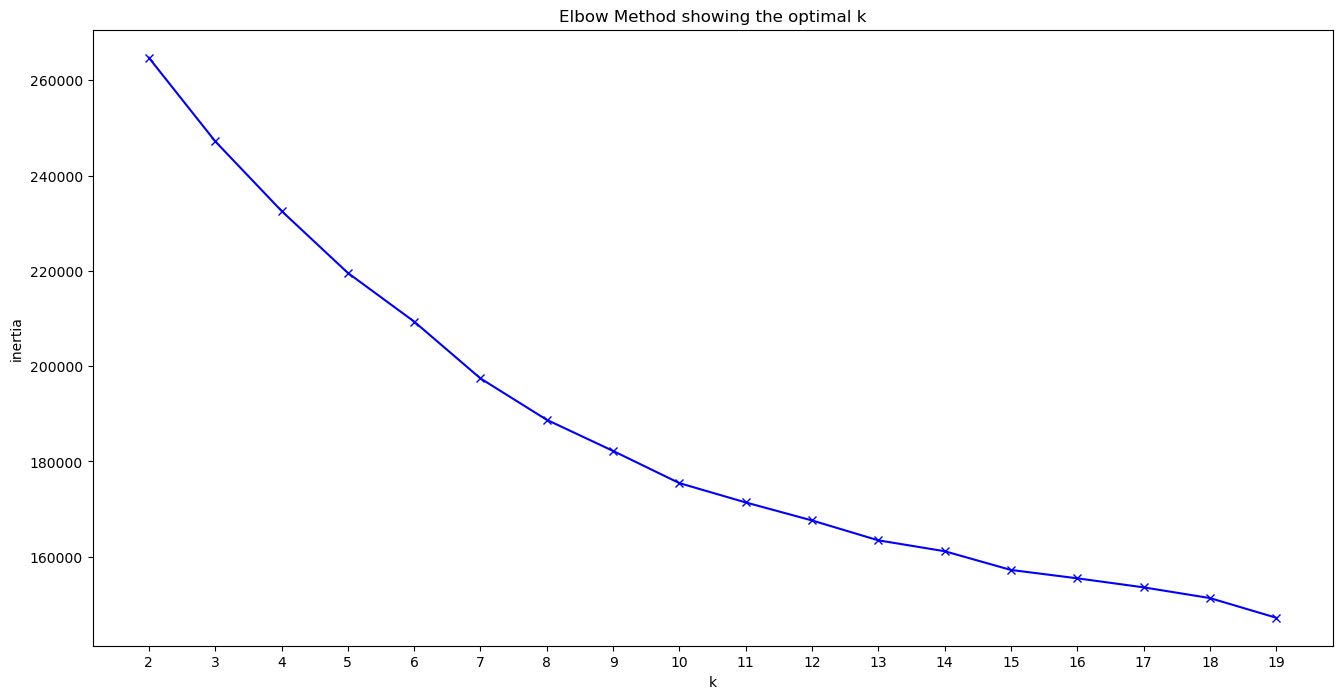

In [134]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

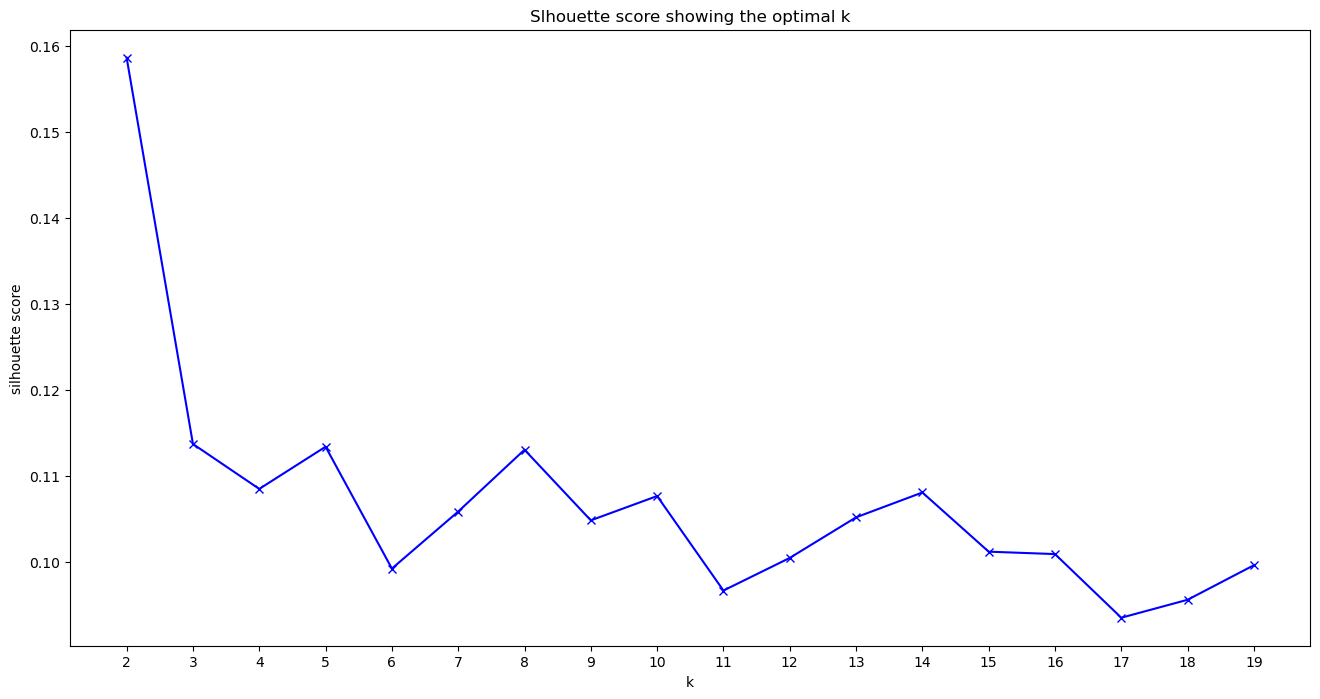

In [135]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_features)
    silhouette.append(silhouette_score(scaled_features, kmeans.predict(scaled_features)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
# optimal_k = 5, 8, 10, 14, 16

In [162]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(scaled_features)

C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1234)

In [192]:
clusters = kmeans.predict(scaled_features)

pd.Series(clusters).value_counts().sort_index()

0    1858
1    8251
2    1381
3    5541
4    4718
Name: count, dtype: int64

In [193]:
clusters

array([1, 1, 3, ..., 3, 1, 1])

In [197]:
cluster = pd.DataFrame({'clusters': clusters})

selected_columns = audio_features_list[['song_name', 'name', 'song_id', 'popularity']]

cluster_number = pd.concat([selected_columns, cluster], axis=1)

cluster_number

,song_name,name,song_id,popularity,clusters
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,72.0,1
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.0,1
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.0,3
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,22.0,3
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.0,1
...,...,...,...,...,...
21744,Figure 8,FKA twigs,5Y9IIH8Xmo1nuk0gfFjc4Q,0.0,0
21745,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.0,3
21746,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.0,3
21747,Come Dancing,The Kinks,32y1kRg6IF3f6jpkHxzFoK,0.0,1


# Recommendation for song

In [223]:
song_input = input("Enter a song title or artist name: ")

song_input =  4

if user_input_cluster in cluster_number["clusters"].unique():
    cluster_songs = cluster_number[cluster_number["clusters"] == user_input_cluster]
    recommended_song = cluster_songs["song_name"].sample().iloc[0]
    artist_name = cluster_songs["name"].iloc[0] 
    
    print(recommended_song, 'by', artist_name)

Enter a song title or artist name: Miley
You Win Again - Single Version by Elvis Presley
